In [ ]:

from dotenv import load_dotenv
load_dotenv()

STOCK_SYMBOL = 'TSLA' 

# Agent 1: Market Analyst Agent
- ✅ Collects real-time stock/crypto data from Yahoo Finance
- ✅ Fetches stock prices, moving averages, and volatility data
- ✅ Identifies key technical indicators (RSI, MACD, Bollinger Bands)

In [ ]:
from crewai import Agent, LLM


groq_llm_1 = LLM(model="groq/llama3-70b-8192",max_tokens=500)

# Market Analyst agent
market_analyst = Agent(
    role="Market Analyst",
    goal="Analyze stock and crypto market trends based on real-time and historical data.",
    backstory="A highly skilled financial analyst with expertise in stock market trends, economic indicators, and technical analysis.",
    llm=groq_llm_1,  
    verbose=True,
)

print("✅ Market Analyst Agent Created with Groq LLM!")


✅ Market Analyst Agent Created with Groq LLM!


In [ ]:
# Fetch Real-Time Stock Data (Yahoo Finance)
import yfinance as yf

def get_stock_data(symbol, period="1y", interval="1d"):
    """Fetches historical stock data from Yahoo Finance."""
    stock = yf.Ticker(symbol)
    data = stock.history(period=period, interval=interval)
    return data

#  Fetch Tesla (TSLA) stock data
stock_data = get_stock_data(STOCK_SYMBOL)
print(stock_data.head())  

                                 Open        High         Low       Close  \
Date                                                                        
2024-03-28 00:00:00-04:00  177.449997  179.570007  175.300003  175.789993   
2024-04-01 00:00:00-04:00  176.169998  176.750000  170.210007  175.220001   
2024-04-02 00:00:00-04:00  164.750000  167.690002  163.429993  166.630005   
2024-04-03 00:00:00-04:00  164.020004  168.820007  163.279999  168.380005   
2024-04-04 00:00:00-04:00  170.070007  177.190002  168.009995  171.110001   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-03-28 00:00:00-04:00   77654800        0.0           0.0  
2024-04-01 00:00:00-04:00   81562100        0.0           0.0  
2024-04-02 00:00:00-04:00  116650600        0.0           0.0  
2024-04-03 00:00:00-04:00   82950100        0.0           0.0  
2024-04-04 00:00:00-04:00  123162000        0.0           0.0  


In [ ]:
# Add Technical Analysis (SMA, RSI)

def add_technical_indicators(data):
    """Adds Moving Averages and RSI to stock data."""
    data["SMA_50"] = data["Close"].rolling(window=50).mean()  # 50-day SMA
    data["SMA_200"] = data["Close"].rolling(window=200).mean()  # 200-day SMA

    # RSI Calculation
    delta = data["Close"].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data["RSI"] = 100 - (100 / (1 + rs))

    return data

# Add indicators to Tesla data
stock_data = add_technical_indicators(stock_data)
print(stock_data.tail())  

                                 Open        High         Low       Close  \
Date                                                                        
2025-03-21 00:00:00-04:00  234.990005  249.520004  234.550003  248.710007   
2025-03-24 00:00:00-04:00  258.079987  278.640015  256.329987  278.390015   
2025-03-25 00:00:00-04:00  283.600006  288.200012  271.279999  288.140015   
2025-03-26 00:00:00-04:00  282.660004  284.899994  266.510010  272.059998   
2025-03-27 00:00:00-04:00  272.480011  291.850006  271.820007  273.130005   

                              Volume  Dividends  Stock Splits      SMA_50  \
Date                                                                        
2025-03-21 00:00:00-04:00  132728700        0.0           0.0  335.324799   
2025-03-24 00:00:00-04:00  169079900        0.0           0.0  332.993799   
2025-03-25 00:00:00-04:00  150361500        0.0           0.0  330.861800   
2025-03-26 00:00:00-04:00  156254400        0.0           0.0  328.236800  

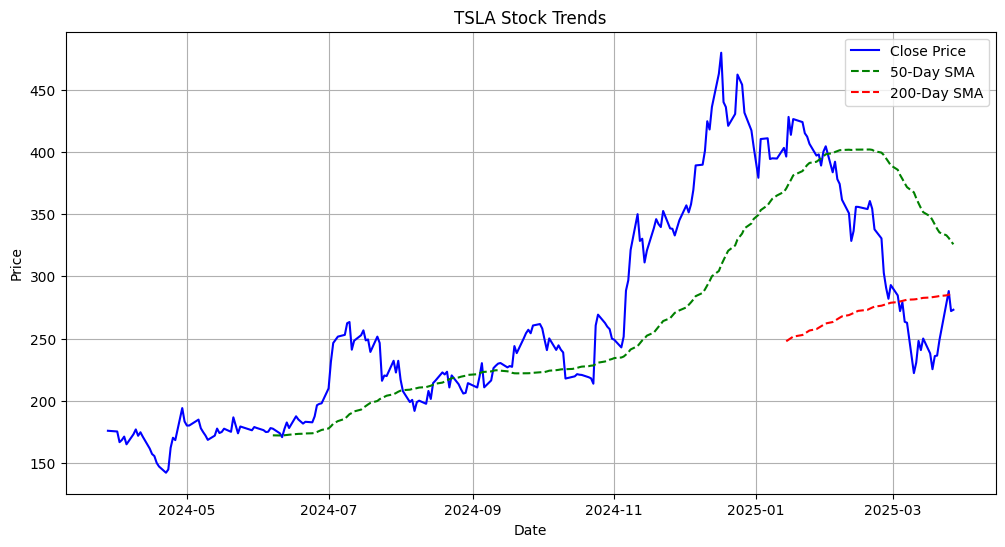

In [5]:
# Visualize Stock Trends
import matplotlib.pyplot as plt

def plot_stock_trends(data, title="Stock Trends"):
    plt.figure(figsize=(12,6))
    plt.plot(data.index, data["Close"], label="Close Price", color="blue")
    plt.plot(data.index, data["SMA_50"], label="50-Day SMA", color="green", linestyle="dashed")
    plt.plot(data.index, data["SMA_200"], label="200-Day SMA", color="red", linestyle="dashed")
    plt.legend()
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid()
    plt.show()

# Plot Tesla stock trends
plot_stock_trends(stock_data, f"{STOCK_SYMBOL} Stock Trends")


# Agent 2: Sentiment Analysis Agent
This agent will:
- ✅ Fetch financial news using Serper API
- ✅ Summarize insights using Groq's model

In [ ]:

import os
from crewai.tools import tool
from crewai import Agent,LLM  
from crewai_tools import SerperDevTool

SERPER_API_KEY = os.getenv("SERPER_API_KEY")
groq_llm_2 = LLM(model="groq/gemma2-9b-it",max_tokens=700)

#  Use built-in SerperDevTool
serper_tool = SerperDevTool(
    search_url="https://google.serper.dev/search", n_results=1
)

# ✅ Sentiment Analysis Agent
sentiment_analysis_agent = Agent(
    role="Sentiment Analyst",
    goal="Analyze stock sentiment.",
    backstory="A concise AI financial analyst for quick sentiment assessment.",
    llm=groq_llm_2,  
    verbose=False,
    allow_delegation=False,
    tools=[serper_tool]
)

d:\Agentic_AI\MarketMinds\MarketMinds_env\lib\site-packages\pydantic\_internal\_config.py:295: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)
d:\Agentic_AI\MarketMinds\MarketMinds_env\lib\site-packages\pydantic\_internal\_fields.py:192: UserWarning: Field name "schema" in "DatabricksQueryToolSchema" shadows an attribute in parent "BaseModel"
  warnings.warn(
d:\Agentic_AI\MarketMinds\MarketMinds_env\lib\site-packages\crewai_tools\tools\file_writer_tool\file_writer_tool.py:2: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.util import strtobool
d:\Agentic_AI\MarketMinds\MarketMinds_env\lib\site-packages\pydantic\_internal\_generate

# Agent 3: Investment Report Generator Agent
- ✅ Collect insights from Market Analyst and Sentiment Analysis agents
- ✅ Use Groq's LLM to generate a structured investment report
- ✅ Return a human-readable report with key insights

In [3]:
from crewai import Agent, LLM

groq_llm_1 = LLM(model="groq/llama3-70b-8192",max_tokens=1000)

Investment_report_generator = Agent(
    role="Investment Report Generator",
    goal="Generate structured investment reports based on market and sentiment analysis",
    backstory=(
        "An AI-powered financial analyst who synthesizes stock and crypto insights into "
        "clear, actionable investment reports."
    ),
    llm = groq_llm_1,
    allow_delegation= False
)
print("✅ Investment Report Generator Agent Created with Groq LLM!")

✅ Investment Report Generator Agent Created with Groq LLM!


# Agent 4: Risk Assesment Agent
- ✅ Fetch stock market data from Alpha Vantage.
- ✅ Analyzes the stock risk

In [4]:
import os
import requests

# Load environment variables
ALPHA_VANTAGE_API_KEY = os.getenv("ALPHA_VANTAGE_API_KEY")

groq_llm_3 = LLM(model="groq/llama-3.1-8b-instant",max_tokens=1000)

# Define the Risk Assessment Agent
risk_assessment_agent = Agent(
    role="Risk Analyst",
    goal="Assess financial risks based on market data and risk metrics.",
    backstory="A financial expert specializing in risk management, volatility analysis, and financial stability assessment.",
    llm=groq_llm_3,
    verbose=True,
    allow_delegation=False
)
print("✅ Risk Assessment Agent Created with Groq LLM!")


✅ Risk Assessment Agent Created with Groq LLM!


In [ ]:
def get_risk_data(symbol):
    """Fetches risk metrics and volatility data from Alpha Vantage."""
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "apikey": ALPHA_VANTAGE_API_KEY
    }
    
    response = requests.get(url, params=params)
    print(f"[DEBUG] Response Status: {response.status_code}")
    print(f"[DEBUG] Raw API Response: {response.text}")  

    data = response.json()
    
    if "Time Series (Daily)" in data:
        return data["Time Series (Daily)"]
    elif "Note" in data:
        return {"error": "API Limit Exceeded: " + data["Note"]}
    elif "Error Message" in data:
        return {"error": "Invalid API Call: " + data["Error Message"]}
    else:
        return {"error": "Failed to fetch data. Check API key, symbol, or limits."}


# Example: Fetch Tesla (TSLA) risk data
tsla_risk_data = get_risk_data(STOCK_SYMBOL)
print(tsla_risk_data)  

[DEBUG] Response Status: 200
[DEBUG] Raw API Response: {
    "Meta Data": {
        "1. Information": "Daily Prices (open, high, low, close) and Volumes",
        "2. Symbol": "TSLA",
        "3. Last Refreshed": "2025-03-27",
        "4. Output Size": "Compact",
        "5. Time Zone": "US/Eastern"
    },
    "Time Series (Daily)": {
        "2025-03-27": {
            "1. open": "272.4800",
            "2. high": "291.8500",
            "3. low": "271.8216",
            "4. close": "273.1300",
            "5. volume": "162572146"
        },
        "2025-03-26": {
            "1. open": "282.6600",
            "2. high": "284.9000",
            "3. low": "266.5100",
            "4. close": "272.0600",
            "5. volume": "156254441"
        },
        "2025-03-25": {
            "1. open": "283.6000",
            "2. high": "288.2000",
            "3. low": "271.2800",
            "4. close": "288.1400",
            "5. volume": "150361538"
        },
        "2025-03-24": {
   

# TASKS OF AGENTS

In [11]:
# Task for Market Analysis
from crewai import Task


market_analysis_task = Task(
    description=f"Analyze {STOCK_SYMBOL}'s stock trends and predict its future performance based on historical data.",
    agent=market_analyst,  
    expected_output=f"A detailed financial analysis report on {STOCK_SYMBOL}'s stock performance."
)


In [ ]:
# Sentiment Analysis Task
sentiment_analysis_task = Task(
    description=f"Get {STOCK_SYMBOL} sentiment from 1 news headline.",
    agent=sentiment_analysis_agent,
    expected_output="Sentiment: [Positive/Negative/Neutral] | Headline: [Short Summary (Max 10 words)]",
    tools=[serper_tool],
    return_output=True
)

In [ ]:
# Task for Risk Assessment
risk_assessment_task = Task(
    description="Fetch stock market data and risk assessment for the given stock symbol.",
    agent=risk_assessment_agent,
    expected_output="A risk assessment report with stock price data and risk score.",
    input_variables=["symbol"]  
)

In [ ]:
#Investment Report Generator Task
Investment_report_task = Task(
    description=(
        "Compile insights from the Market Analyst, Sentiment Analysis, and Risk Assessment agents. "
        "Generate a structured investment report including market sentiment, technical indicators, "
        "risk assessment, and a buy/sell recommendation. Format the response in a professional financial report style."
    ),
    expected_output=(
        "A structured financial report containing: \n"
        "- Asset name (e.g., AAPL, BTC) \n"
        "- Market sentiment (Bullish, Bearish, Neutral) \n"
        "- Technical indicators (RSI, MACD, SMA, etc.) \n"
        "- Price prediction or trend analysis \n"
        "- Risk level assessment (Low, Medium, High) \n"
        "- Key risk factors affecting investment \n"
        "- Final investment recommendation (Buy/Sell/Hold) \n"
        "- Supporting insights from market trends and risk analysis"
    ),
    agent=Investment_report_generator
)


# CREWAI INTEGRATION

In [ ]:
# Create a Crew & Run the Agent
from crewai import Crew

market_crew = Crew(
    agents=[market_analyst, sentiment_analysis_agent, risk_assessment_agent, Investment_report_generator], 
    tasks=[market_analysis_task, sentiment_analysis_task, risk_assessment_task, Investment_report_task]
)

# Run the Crew
investment_report_result = market_crew.kickoff()

print("📊 Investment Report:\n", investment_report_result)

# Agent: Market Analyst
## Task: Analyze TSLA's stock trends and predict its future performance based on historical data.


# Agent: Market Analyst
## Final Answer: 
**Tesla, Inc. (TSLA) Stock Analysis Report**

**Company Overview**

Tesla, Inc. is an American electric vehicle and clean energy company founded in 2003. The company is headquartered in Palo Alto, California, and has become one of the leading players in the electric vehicle market.

**Historical Performance**

Tesla's stock has been highly volatile over the past five years, with significant fluctuations in price. The stock price has risen from around $30 in 2016 to over $1,000 in 2021, driven by the company's growing sales, increasing demand for electric vehicles, and declining production costs.

**Technical Analysis**

**Charts:**

The daily chart of TSLA shows a strong uptrend, with the stock price consistently making new highs over the past year. The relative strength index (RSI) indicates that the stock is overbought, 